In [ ]:
# Dependencies and Setup
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Load CSV into dataframe
ufo = pd.read_csv("../Project_Data/scrubbed.csv", parse_dates=["datetime"])
ufo

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556


In [ ]:
#find 24:00 and convert to 00:00 in datetime
ufo['datetime']=ufo['datetime'].replace({'24:00':'00:00'}, regex=True)


In [ ]:
#convert str to TimeStamp
ufo['datetime'] = pd.to_datetime(ufo['datetime'],format='%m/%d/%Y %H:%M')


In [ ]:
#convert seconds into float (error will be fixed)
try: 
    ufo['duration (seconds)'].astype(float)
except ValueError:
    ('could not convert string to float')


In [ ]:
#fix error
typos = []

row = -1 
for el in ufo['duration (seconds)']:
    row += 1
    if type(el) == float:
        continue
    for char in el:
        if char.isnumeric() or char == ".":
            continue
        else:
            typos.append((row, el))
            break
typos

[(27822, '2`'), (35692, '8`'), (41201, '2631600  '), (58591, '0.5`')]

In [ ]:
correct = {27822: '2', 35692: '8', 41201: '2631600', 58591: '0.5'  }

In [ ]:
for k, v in correct.items():
    ufo.loc[k, 'duration (seconds)'] = v

In [ ]:
ufo['duration_sec'] = ufo['duration (seconds)'].astype(float)

In [ ]:
#converting latitude into float
try: 
    ufo['latitude'].astype(float)
except ValueError:
    ('could not convert string to float')

In [ ]:
row = -1
container = []
for i in ufo['latitude']:
    row += 1
    try:
        float(i)
    except ValueError:
        container.append((i, row))

In [ ]:
for c, v in enumerate(ufo.columns.values):
    print(c, '--->', v)

0 ---> datetime
1 ---> city
2 ---> state
3 ---> country
4 ---> shape
5 ---> duration (seconds)
6 ---> duration (hours/min)
7 ---> comments
8 ---> date posted
9 ---> latitude
10 ---> longitude 
11 ---> duration_sec


In [ ]:
ufo.iloc[43782 , 9] = '33.200088'

In [ ]:
ufo['latitude'] = ufo['latitude'].astype(float)

In [ ]:
#remove space in longitude column name
ufo.columns.values[8] = 'longitude'

In [ ]:
ufo['longitude'] = ufo['longitude '].astype(float)

In [ ]:
#check empty values and replace NaN with blanks
ufo.isnull().sum()

datetime                   0
city                       0
state                   5797
country                 9670
shape                   1932
duration (seconds)         0
duration (hours/min)       0
comments                  15
longitude                  0
latitude                   0
longitude                  0
duration_sec               0
longitude                  0
dtype: int64

In [ ]:
#add new columns to the dataframe
ufo['month'] = ufo['datetime'].dt.month.astype(int)
ufo['day'] = ufo['datetime'].dt.day.astype(int)
ufo['day of the week'] = ufo['datetime'].dt.dayofweek.astype(int)
ufo['hour'] = ufo['datetime'].dt.hour.astype(int)
ufo['day of year'] = ufo['datetime'].dt.strftime('%m-%d')
ufo['year'] = ufo['datetime'].dt.year.astype(int)
temp = ufo['year'].value_counts().sort_index()
temp = ufo['hour'].value_counts()
temp.sort_index(inplace=True)

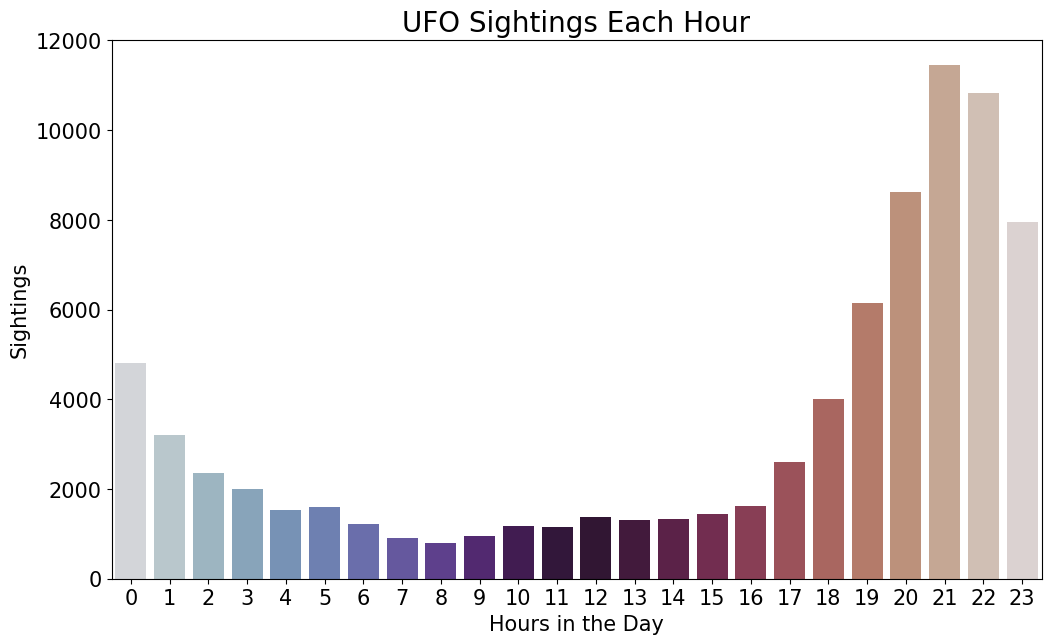

In [ ]:
#plot hourly sightings
plt.figure(figsize=(12,7))
sns.barplot(temp.index, temp, palette="twilight")
plt.xlabel("Hours in the Day", fontsize=15)
plt.ylabel("Sightings", fontsize=15)
plt.title("UFO Sightings Each Hour", fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
#print
plt.savefig("UFO_sightings_hourly.jpg", fmt="jpg")

In [ ]:
temp = ufo['day of the week'].value_counts()
temp.sort_index(inplace=True)

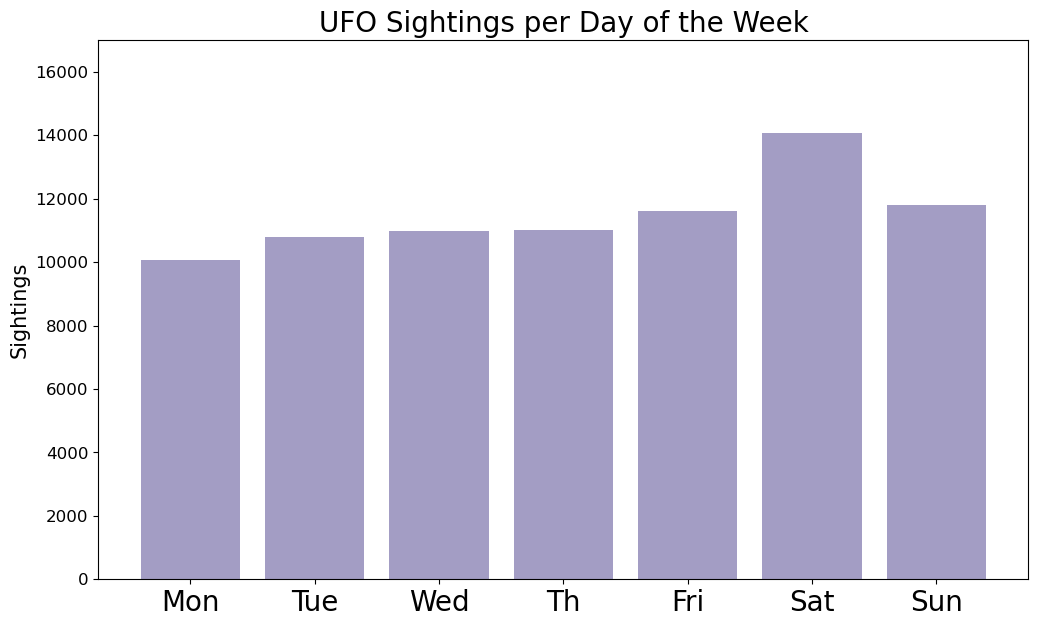

In [ ]:
#plot daily sightings
day_of_week = ["Mon", "Tue", "Wed", "Th", "Fri", "Sat", "Sun"]

plt.figure(figsize=(12, 7))
plt.bar(temp.index, temp, color="darkslateblue", alpha=0.5, lw=0)
plt.xticks([0, 1, 2, 3, 4, 5, 6], day_of_week, fontsize=20)
plt.yticks(fontsize=12)
plt.title("UFO Sightings per Day of the Week", fontsize=20)
plt.ylabel("Sightings", fontsize=15)
plt.ylim(0, 17000)
#print
plt.savefig("UFO_Sightings_Daily.jpg", fmt="jpg")

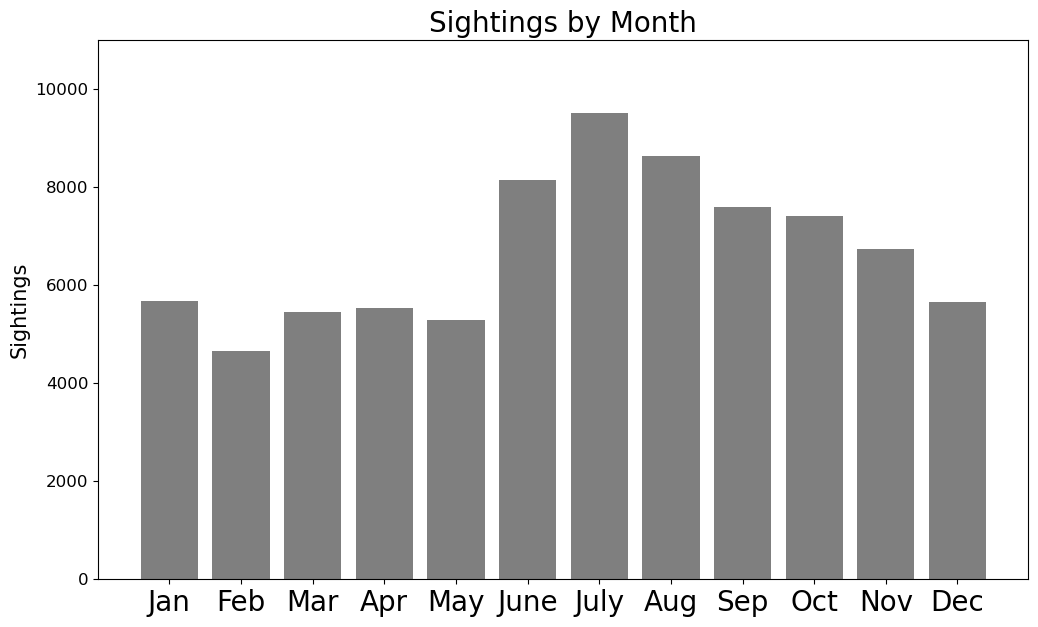

In [ ]:
temp = ufo['month'].value_counts()
temp.sort_index(inplace=True, ascending=False)
month = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.figure(figsize=(12, 7))
plt.bar(temp.index, temp, color="black", alpha=0.5, lw=2)
plt.xticks(list(range(1, 13)), month, fontsize=20)
plt.yticks(fontsize=12)
plt.title("Sightings by Month", fontsize=20)
plt.ylabel("Sightings", fontsize=15)
plt.ylim(0, 11000)
#plt.show()

plt.savefig("monthly_sightings.jpg", fmt="jpg")